In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("cleaned_final.csv")

In [4]:
pd.set_option('display.max_columns', None)
display(df.head())
df.shape

,PM10,SO2,CO,NO2,NOX,NO,O3,temp,feelslike,humidity,dew,windgust,windspeed,winddir,pressure,visibility,cloudcover,solarradiation,solarenergy,uvindex,hour,day,month,dayofweek,season,wind_dir_rad,wind_dir_sin,wind_dir_cos,weather_group_code,is_rainy,humidity_level,feelslike_diff,is_weekend,is_nighttime,is_rush_hour,humid_heat_index,uv_level
0,47.976,2.622,633.510,91.5125,123.564,44.600,4.0,10.0,10.0,87.38,8.0,16.6,9.4,250.0,1020.0,9.0,50.0,0.0,0.0,0.0,0,2,1,6,1,4.363323,-0.939693,-0.342020,0,0,2,0.0,1,1,0,873.80,0
1,50.498,2.786,537.026,90.1475,121.566,43.642,3.6,10.0,10.0,87.38,8.0,15.5,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,1,2,1,6,1,4.537856,-0.984808,-0.173648,0,0,2,0.0,1,1,0,873.80,0
2,47.264,3.456,615.502,102.6875,119.832,39.820,3.4,10.0,10.0,87.38,8.0,15.8,13.0,260.0,1021.0,10.0,50.0,0.0,0.0,0.0,2,2,1,6,1,4.537856,-0.984808,-0.173648,0,0,2,0.0,1,1,0,873.80,0
3,46.026,3.260,693.612,82.3575,120.728,46.062,3.7,10.0,10.0,87.38,8.0,15.5,5.4,250.0,1021.0,10.0,50.0,0.0,0.0,0.0,3,2,1,6,1,4.363323,-0.939693,-0.342020,0,0,2,0.0,1,1,0,873.80,0
4,47.514,3.252,626.874,54.8325,97.116,41.600,4.0,9.0,9.0,93.45,8.0,14.4,0.0,0.0,1021.0,10.0,50.0,0.0,0.0,0.0,4,2,1,6,1,0.000000,0.000000,1.000000,0,0,2,0.0,1,1,0,841.05,0


(23782, 37)

In [ ]:
import xgboost as xgb
import pickle
import numpy as np
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error, r2_score
)
from sklearn.model_selection import train_test_split

def evaluate_xgb_so2(df, target='SO2'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = xgb.XGBRegressor()

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" XGBoost (Default) - SO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [10]:
evaluate_xgb_so2(df)

📌 XGBoost (Default) - SO2 Tahmini:
Train MAE: 0.41 | Test MAE: 0.60
Train RMSE: 0.58 | Test RMSE: 0.90
MAPE (Test): 20.92%
Median AE (Test): 0.41
Explained Variance Score: 0.6040
Train R² Score: 0.8357 | Test R² Score: 0.6038
Max Error: 6.70


In [ ]:
def evaluate_rf_so2(df, target='SO2'):
    import pickle
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" Random Forest (Default) - SO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [12]:
evaluate_rf_so2(df)

📌 Random Forest (Default) - SO2 Tahmini:
Train MAE: 0.20 | Test MAE: 0.53
Train RMSE: 0.31 | Test RMSE: 0.84
MAPE (Test): 18.02%
Median AE (Test): 0.32
Explained Variance Score: 0.6562
Train R² Score: 0.9536 | Test R² Score: 0.6554
Max Error: 6.79


In [ ]:
def evaluate_lgbm_so2(df, target='SO2'):
    import pickle
    import numpy as np
    import lightgbm as lgb
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = lgb.LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" LightGBM (Default) - SO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [14]:
evaluate_lgbm_so2(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000983 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 28
[LightGBM] [Info] Start training from score 3.051493
📌 LightGBM (Default) - SO2 Tahmini:
Train MAE: 0.60 | Test MAE: 0.67
Train RMSE: 0.83 | Test RMSE: 0.97
MAPE (Test): 23.73%
Median AE (Test): 0.49
Explained Variance Score: 0.5337
Train R² Score: 0.6659 | Test R² Score: 0.5335
Max Error: 7.06


e:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Sistem belirtilen dosyayı bulamıyor
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "e:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "e:\Anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "e:\Anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error, r2_score
)
import numpy as np

def evaluate_catboost_so2(df, target='SO2'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(verbose=0, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" CatBoost (Default) - SO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

In [16]:
evaluate_catboost_so2(df)

📌 CatBoost (Default) - SO2 Tahmini:
Train MAE: 0.50 | Test MAE: 0.61
Train RMSE: 0.72 | Test RMSE: 0.90
MAPE (Test): 21.42%
Median AE (Test): 0.44
Explained Variance Score: 0.5986
Train R² Score: 0.7533 | Test R² Score: 0.5985
Max Error: 6.64


In [ ]:
#-----------------------------------------HIPERPARAMETRE AYARI-------------------------------------------------------------

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score, max_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_xgb_so2_manual(df, target='SO2'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = XGBRegressor(
        n_estimators=300,
        max_depth=8,
        learning_rate=0.02,
        subsample=0.7,
        colsample_bytree=0.7,
        gamma=1,
        reg_alpha=5,
        reg_lambda=10,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" XGBoost (Optimize) - SO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [44]:
evaluate_xgb_so2_manual(df)

📌 XGBoost (Optimize) - SO2 Tahmini:
Train MAE: 0.54 | Test MAE: 0.64
Train RMSE: 0.78 | Test RMSE: 0.95
MAPE (Test): 22.58%
Median AE (Test): 0.45
Explained Variance Score: 0.5542
Train R² Score: 0.7063 | Test R² Score: 0.5540
Max Error: 6.68


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    mean_absolute_percentage_error, explained_variance_score,
    max_error, r2_score
)
from sklearn.model_selection import train_test_split
import numpy as np

def evaluate_rf_manual(df, target='SO2'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = RandomForestRegressor(
        n_estimators=800,
        max_depth=10,
        min_samples_split=7,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=42,
        n_jobs=-1
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # 🔍 Metrikler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

 
    print(" Random Forest (Manuel Optimize) - SO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [66]:
evaluate_rf_manual(df)

📌 Random Forest (Manuel Optimize) - PM10 Tahmini:
Train MAE: 0.65 | Test MAE: 0.73
Train RMSE: 0.91 | Test RMSE: 1.05
MAPE (Test): 25.65%
Median AE (Test): 0.53
Explained Variance Score: 0.4548
Train R² Score: 0.6011 | Test R² Score: 0.4547
Max Error: 7.35


In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    median_absolute_error, mean_absolute_percentage_error,
    explained_variance_score, max_error
)
import numpy as np

def evaluate_lgbm_so2_manual(df, target='SO2'):
    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    
    model = LGBMRegressor(
        n_estimators=300,
        max_depth=10,
        learning_rate=0.04,
        num_leaves=50,
        min_child_samples=10,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=5,
        reg_lambda=10,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(f" LightGBM (Optimize) SO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")


In [48]:
evaluate_lgbm_so2_manual(df)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2876
[LightGBM] [Info] Number of data points in the train set: 19025, number of used features: 28
[LightGBM] [Info] Start training from score 3.051493
📌 LightGBM (Optimize) - SO2 Tahmini:
Train MAE: 0.53 | Test MAE: 0.63
Train RMSE: 0.75 | Test RMSE: 0.92
MAPE (Test): 22.08%
Median AE (Test): 0.45
Explained Variance Score: 0.5807
Train R² Score: 0.7270 | Test R² Score: 0.5805
Max Error: 6.67


In [ ]:
def evaluate_catboost_so2(df, target='SO2'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np
    import pickle

    selected_features = [
        'temp', 'feelslike', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'uvindex', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'humidity_level', 'feelslike_diff', 'is_rainy',
        'is_weekend', 'is_nighttime', 'is_rush_hour',
        'humid_heat_index', 'uv_level'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(
        iterations=700,
        learning_rate=0.05,
        depth=8,
        l2_leaf_reg=10,
        verbose=0,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    print(" CatBoost (Optimize) - SO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

#     model_data = {
#     "model": model,
#     "mae": mae_test,
#     "features": X.columns.tolist()
# }

#     with open("so2_model.pkl", "wb") as f:
#      pickle.dump(model_data, f)

In [6]:
evaluate_catboost_so2(df)

📌 CatBoost (Optimize) - SO2 Tahmini:
Train MAE: 0.50 | Test MAE: 0.61
Train RMSE: 0.72 | Test RMSE: 0.90
MAPE (Test): 21.19%
Median AE (Test): 0.44
Explained Variance Score: 0.6056
Train R² Score: 0.7489 | Test R² Score: 0.6055
Max Error: 6.41


In [2]:
def evaluate_catboost_so2(df, target='SO2'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np
    import pickle

    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',

        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
    ]

    X = df[selected_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    model = CatBoostRegressor(
        iterations=750,
        learning_rate=0.1,
        depth=10,
        l2_leaf_reg=12,
        verbose=0,
        random_state=42
    )

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metirkler
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mape = mean_absolute_percentage_error(y_test, y_test_pred)
    medae = median_absolute_error(y_test, y_test_pred)
    evs = explained_variance_score(y_test, y_test_pred)
    r2 = r2_score(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    maxerr = max_error(y_test, y_test_pred)

    percentiles = np.percentile(y_test_pred, [25, 50, 75])
    p25, p50, p75 = percentiles
    print("\nPM10 Tahmin Percentile Eşikleri:")
    print(f"Yeşil (İyi):     0 – {p25:.2f}")
    print(f"Sarı (Orta):     {p25:.2f} – {p50:.2f}")
    print(f"Turuncu (Kötü):  {p50:.2f} – {p75:.2f}")
    print(f"Kırmızı (Çok Kötü): {p75:.2f} ve üzeri")

    print(" CatBoost (Optimize) - SO2 Tahmini:")
    print(f"Train MAE: {mae_train:.2f} | Test MAE: {mae_test:.2f}")
    print(f"Train RMSE: {rmse_train:.2f} | Test RMSE: {rmse_test:.2f}")
    print(f"MAPE (Test): {mape*100:.2f}%")
    print(f"Median AE (Test): {medae:.2f}")
    print(f"Explained Variance Score: {evs:.4f}")
    print(f"Train R² Score: {r2_train:.4f} | Test R² Score: {r2:.4f}")
    print(f"Max Error: {maxerr:.2f}")

    import matplotlib.pyplot as plt
    import seaborn as sns

    # Seaborn stilini aktif et
    sns.set(style="whitegrid")

    plt.figure(figsize=(5, 4))

    # Nokta çizimi
    plt.scatter(y_test, y_test_pred, alpha=0.6, s=30, color='#2c7fb8', edgecolor='black', linewidth=0.5, label="Predictions")

    # y = x çizgisi
    plt.plot([1, 12], [1, 12], 'r--', linewidth=1.5, label='y = x')

    # Eksen ayarları
    plt.xlim(1, 11)
    plt.ylim(1, 11)
    plt.xlabel("Actual SO2 Value", fontsize=12)
    plt.ylabel("Predicted SO2 Value", fontsize=12)
    plt.title("Prediction Error Plot", fontsize=13)

    # Grid ve kenarlık ayarları
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(frameon=True, loc='upper left', fontsize=10)

    # Kenarlıkları kaldır
    sns.despine()

    plt.tight_layout()
    plt.show()

    # 🎯 Feature Importance Grafiği
    importances = model.feature_importances_
    importance_df = pd.DataFrame({
        'Feature': selected_features,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False).head(5)

    plt.figure(figsize=(8, 5))
    sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
    plt.title("SO2 - Feature Importance", fontsize=13)
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.grid(True, axis='x', linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

    model_data = {
      "model": model,
      "mae": mae_test,
      "features": X.columns.tolist()
  }

    with open("so2_model.pkl", "wb") as f:
       pickle.dump(model_data, f)


PM10 Tahmin Percentile Eşikleri:
Yeşil (İyi):     0 – 2.32
Sarı (Orta):     2.32 – 2.74
Turuncu (Kötü):  2.74 – 3.39
Kırmızı (Çok Kötü): 3.39 ve üzeri
 CatBoost (Optimize) - SO2 Tahmini:
Train MAE: 0.30 | Test MAE: 0.52
Train RMSE: 0.43 | Test RMSE: 0.79
MAPE (Test): 17.92%
Median AE (Test): 0.35
Explained Variance Score: 0.6962
Train R² Score: 0.9120 | Test R² Score: 0.6961
Max Error: 6.17


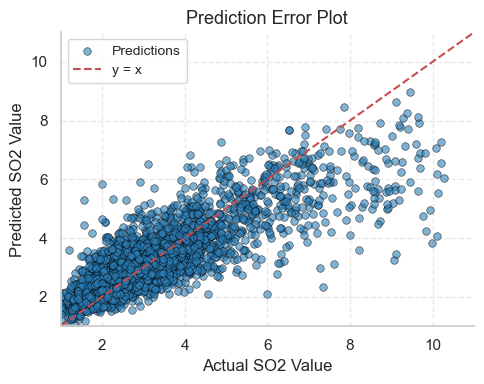

C:\Users\emin8\AppData\Local\Temp\ipykernel_29640\2084914986.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")


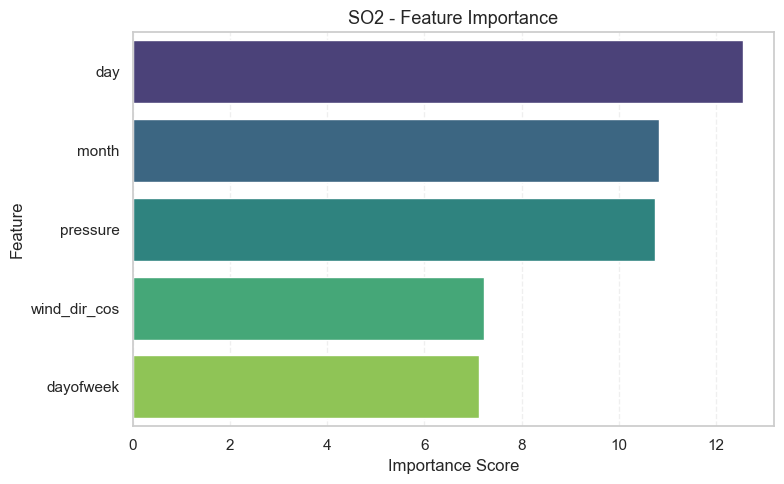

In [3]:
evaluate_catboost_so2(df)

In [3]:
def evaluate_catboost_so2_cv(df, target='SO2'):
    from catboost import CatBoostRegressor
    from sklearn.model_selection import train_test_split, KFold
    from sklearn.metrics import (
        mean_absolute_error, mean_squared_error,
        median_absolute_error, mean_absolute_percentage_error,
        explained_variance_score, max_error, r2_score
    )
    import numpy as np
    import pickle

    selected_features = [
        'temp', 'humidity', 'dew', 'windgust',
        'windspeed', 'pressure', 'cloudcover', 'visibility',
        'solarradiation', 'weather_group_code',
        'hour', 'day', 'month', 'dayofweek', 'season',
        'wind_dir_rad', 'wind_dir_sin', 'wind_dir_cos',
        'is_weekend', 'is_nighttime', 'is_rush_hour'
    ]

    X = df[selected_features]
    y = df[target]

    # Hold-out split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    mae_train_list, mae_val_list = [], []
    rmse_train_list, rmse_val_list = [], []
    r2_train_list, r2_val_list = [], []
    mape_list, medae_list, evs_list, maxerr_list = [], [], [], []

    for train_idx, val_idx in kf.split(X_train):
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model = CatBoostRegressor(
            iterations=750,
            learning_rate=0.1,
            depth=10,
            l2_leaf_reg=12,
            verbose=0,
            random_state=42
        )

        model.fit(X_tr, y_tr)

        y_tr_pred = model.predict(X_tr)
        y_val_pred = model.predict(X_val)

        mae_train_list.append(mean_absolute_error(y_tr, y_tr_pred))
        mae_val_list.append(mean_absolute_error(y_val, y_val_pred))
        rmse_train_list.append(np.sqrt(mean_squared_error(y_tr, y_tr_pred)))
        rmse_val_list.append(np.sqrt(mean_squared_error(y_val, y_val_pred)))
        r2_train_list.append(r2_score(y_tr, y_tr_pred))
        r2_val_list.append(r2_score(y_val, y_val_pred))

        mape_list.append(mean_absolute_percentage_error(y_val, y_val_pred))
        medae_list.append(median_absolute_error(y_val, y_val_pred))
        evs_list.append(explained_variance_score(y_val, y_val_pred))
        maxerr_list.append(max_error(y_val, y_val_pred))

    print("CatBoost (Optimize + CV) - SO2 Tahmini (5-Fold):")
    print(f"Train MAE (mean): {np.mean(mae_train_list):.2f}")
    print(f"Test MAE  (mean): {np.mean(mae_val_list):.2f}")
    print(f"Train RMSE (mean): {np.mean(rmse_train_list):.2f}")
    print(f"Test RMSE  (mean): {np.mean(rmse_val_list):.2f}")
    print(f"Train R² (mean): {np.mean(r2_train_list):.4f}")
    print(f"Test R²  (mean): {np.mean(r2_val_list):.4f}")
    print(f"Test MAPE (mean): {np.mean(mape_list)*100:.2f}%")
    print(f"Test Median AE (mean): {np.mean(medae_list):.2f}")
    print(f"Explained Variance (mean): {np.mean(evs_list):.4f}")
    print(f"Max Error (mean): {np.mean(maxerr_list):.2f}")

    # Hold-out final test değerlendirmesi
    final_model = CatBoostRegressor(
        iterations=750,
        learning_rate=0.1,
        depth=10,
        l2_leaf_reg=12,
        verbose=0,
        random_state=42
    )
    final_model.fit(X_train, y_train)
    final_test_pred = final_model.predict(X_test)
    final_test_mae = mean_absolute_error(y_test, final_test_pred)

    print(f"\nFinal Test MAE (Hold-out set): {final_test_mae:.2f}")

 


In [4]:
evaluate_catboost_so2_cv(df)

CatBoost (Optimize + CV) - SO2 Tahmini (5-Fold):
Train MAE (mean): 0.28
Test MAE  (mean): 0.53
Train RMSE (mean): 0.41
Test RMSE  (mean): 0.80
Train R² (mean): 0.9197
Test R²  (mean): 0.6925
Test MAPE (mean): 18.09%
Test Median AE (mean): 0.36
Explained Variance (mean): 0.6927
Max Error (mean): 6.48

Final Test MAE (Hold-out set): 0.52
